# Clustering Activity

In [20]:
# Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score
import skfuzzy.cluster as fuzz
import numpy as np
import matplotlib.pyplot as plt

# Generate a hypothetical dataset
X, Y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

Exercise: Evaluate four clustering algorithms (K-Means, Fuzzy C-Means, Spectral, and Agglomerative)
1. Apply each clustering algorithm to the dataset where:
- cluster_count = 4
- random_state = 42 (where applicable)
- do not specify affinity, metric, algo, init, linkage (if applicable)
2. Use the **Adjusted Rand index** and **Silhouette Score** to evaluate the clustering performance.
3. Compare the performance of the algorithms based on the aforementioned metrics and decide which algorithm is best suited for the data given.

In [21]:
# code here...

cluster_count = 4
random_state = 42


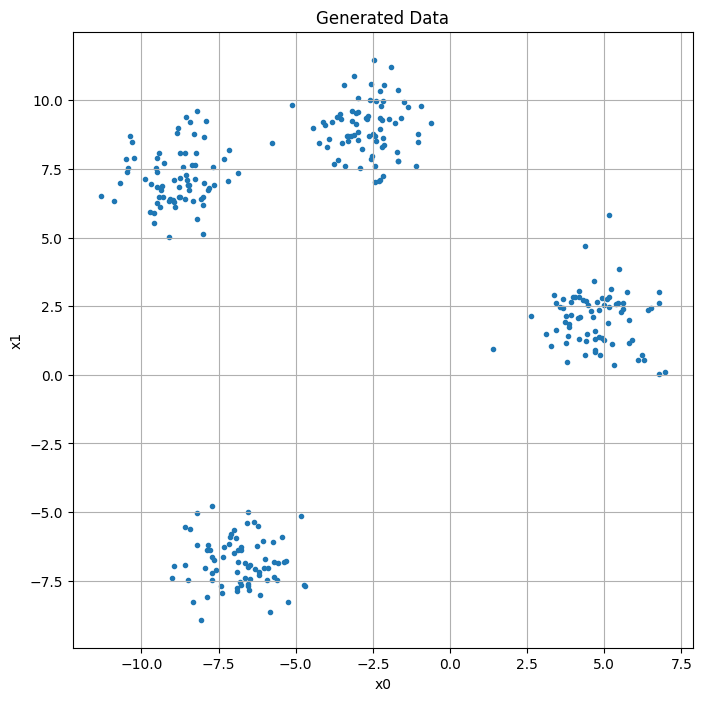

In [22]:
fig = plt.figure(figsize = (8,8))

plt.scatter(X[:, 0], X[:, 1], marker='.')
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Generated Data')
plt.grid()
plt.show()

In [23]:
fig_size=6
classes=4
samples=300
colors = ['red', 'orange', 'lime', 'green', 'blue', 'navy', 'violet']


# K-Means Clustering

Adjusted Rand Score        = 0.99 - KMeans CLustering - init=k-means++ algorithm=lloyd
Silhouette Score           = 0.79 - KMeans CLustering - init=k-means++ algorithm=lloyd

Adjusted Rand Score        = 0.99 - KMeans CLustering - init=k-means++ algorithm=elkan
Silhouette Score           = 0.79 - KMeans CLustering - init=k-means++ algorithm=elkan

Adjusted Rand Score        = 0.99 - KMeans CLustering - init=random algorithm=lloyd
Silhouette Score           = 0.79 - KMeans CLustering - init=random algorithm=lloyd

Adjusted Rand Score        = 0.99 - KMeans CLustering - init=random algorithm=elkan
Silhouette Score           = 0.79 - KMeans CLustering - init=random algorithm=elkan



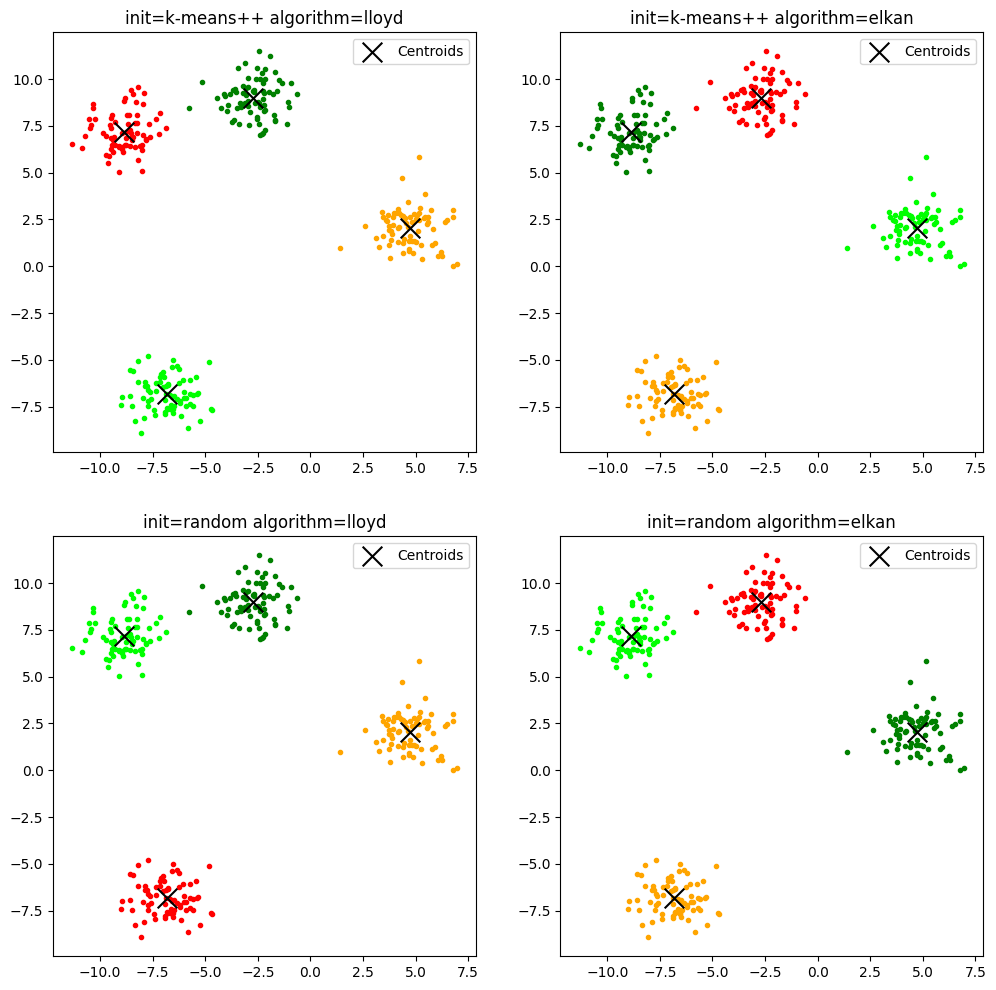

In [24]:
from sklearn.cluster import KMeans

init_array = ['k-means++', 'random']
algo_array = ['lloyd', 'elkan']

fig, axs = plt.subplots(len(init_array), len(algo_array), figsize=(fig_size * len(init_array), fig_size * len(algo_array)))

for i, init in enumerate(init_array):
    for j, algo in enumerate(algo_array):
        ax = axs[i, j]

        model = KMeans(n_clusters=classes, init=init, algorithm=algo, n_init='auto').fit(X)
        targ = model.predict(X)

        for idx, cl in enumerate(np.unique(targ)):
            ax.scatter(X[targ == cl, 0], X[targ == cl, 1], color=colors[idx], marker='.')

        centroids = model.cluster_centers_
        ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='black', label='Centroids')
        ax.legend()
        ax.set_title(f"init={init} algorithm={algo}")

        if Y is not None:
            print(f"Adjusted Rand Score        = {adjusted_rand_score(targ, Y):.2f} - KMeans CLustering - init={init} algorithm={algo}")
        print(f"Silhouette Score           = {silhouette_score(X, targ):.2f} - KMeans CLustering - init={init} algorithm={algo}\n")
plt.show()

# Fuzzer C-Means Clustering

                0             1             2             3
0    1.000000e+00  3.605806e-08  1.023741e-10  1.986883e-10
1    1.000000e+00  4.101604e-08  1.139829e-10  2.150374e-10
2    4.631003e-06  9.999942e-01  1.111232e-06  1.004424e-08
3    2.193496e-09  5.944288e-10  1.155881e-09  1.000000e+00
4    9.999818e-01  1.770717e-05  1.138985e-07  4.156517e-07
..            ...           ...           ...           ...
295  1.452815e-06  9.999985e-01  6.362053e-09  2.718411e-10
296  1.561185e-09  2.252464e-08  1.000000e+00  2.043711e-09
297  3.729008e-05  9.999626e-01  6.682388e-08  3.824586e-09
298  9.999390e-01  6.092716e-05  4.200748e-08  2.883440e-08
299  9.998580e-01  1.419746e-04  4.886933e-08  2.523866e-08

[300 rows x 4 columns]
Adjusted Rand Score        = 0.99 - Fuzzy C-Means
Silhouette Score           = 0.79 - Fuzzy C-Means



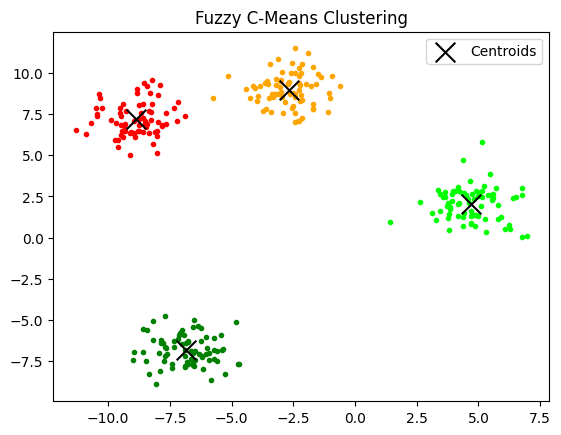

In [26]:
from skfuzzy import cmeans, cmeans_predict
import pandas as pd

centers, u, u0, d, jm, p, fpc = cmeans(data = X.T, c = classes, m = 1.25, error = 0.05, maxiter = 1000)
target2 = np.argmax(u, axis=0)

for idx, cl in enumerate(np.unique(target2)):
    plt.scatter(X[target2 == cl, 0], X[target2 == cl, 1], color=colors[idx], marker='.')
    
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, c='black', label='Centroids')
plt.legend()
plt.title("Fuzzy C-Means Clustering")

# Printing membership matrix
print(pd.DataFrame(u.T))

if Y is not None:
    print(f"Adjusted Rand Score        = {adjusted_rand_score(target2, Y):.2f} - Fuzzy C-Means")
print(f"Silhouette Score           = {silhouette_score(X, target2):.2f} - Fuzzy C-Means\n")

# Spectral Clustering

d:\richl\Documents\Python-Environments\IS_ENV\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Adjusted Rand Score        = 0.99 - Spectral Clustering - nearest_neighbors
Silhouette Score           = 0.79 - Spectral Clustering - nearest_neighbors

Adjusted Rand Score        = 0.99 - Spectral Clustering - rbf
Silhouette Score           = 0.79 - Spectral Clustering - rbf



d:\richl\Documents\Python-Environments\IS_ENV\Lib\site-packages\scipy\sparse\csgraph\_laplacian.py:546: RuntimeWarning: invalid value encountered in sqrt
  w = np.where(isolated_node_mask, 1, np.sqrt(w))


ValueError: array must not contain infs or NaNs

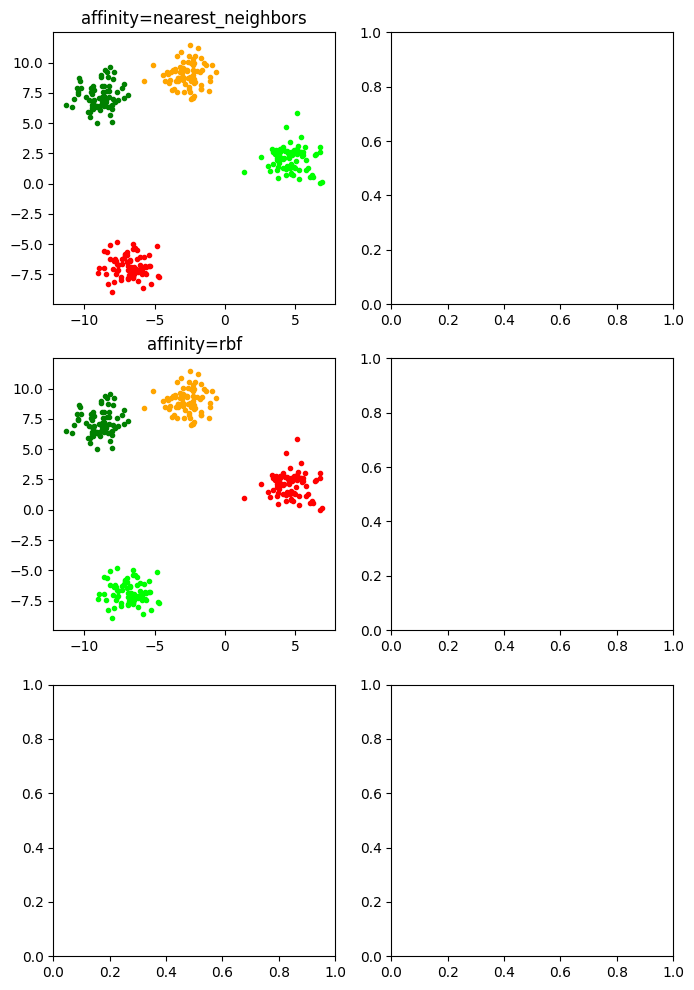

In [27]:
from sklearn.cluster import SpectralClustering

aff_array = ['nearest_neighbors', 'rbf', 'poly', 
                'polynomial', 'laplacian', 'sigmoid']
# you can use these kernels for affinity but they dont always work
# ['additive_chi2', 'chi2', 'linear', 'cosine']

fig, axs = plt.subplots(3, 2, figsize=(8, 12))

for i, aff in enumerate(aff_array):
    m = int(i / (len(aff_array) / 2))
    n = int(i % (len(aff_array) / 2))
    ax = axs[n, m]

    targ = SpectralClustering(n_clusters=classes, affinity=aff, gamma=0.5).fit_predict(X)

    for idx, cl in enumerate(np.unique(targ)):
        ax.scatter(X[targ == cl, 0], X[targ == cl, 1], color=colors[idx], marker='.')
        ax.set_title(f"affinity={aff}")

    if Y is not None:
        print(f"Adjusted Rand Score        = {adjusted_rand_score(targ, Y):.2f} - Spectral Clustering - {aff}")
    print(f"Silhouette Score           = {silhouette_score(X, targ):.2f} - Spectral Clustering - {aff}\n")
plt.show()

# Agglomerative Clustering 

Adjusted Rand Score        = 0.99 - Agglomerative Clustering - linkage=complete metric=cityblock
Silhouette Score           = 0.79 - Agglomerative Clustering - linkage=complete metric=cityblock

Adjusted Rand Score        = 0.99 - Agglomerative Clustering - linkage=average metric=cityblock
Silhouette Score           = 0.79 - Agglomerative Clustering - linkage=average metric=cityblock

Adjusted Rand Score        = 0.71 - Agglomerative Clustering - linkage=single metric=cityblock
Silhouette Score           = 0.63 - Agglomerative Clustering - linkage=single metric=cityblock

Adjusted Rand Score        = 0.99 - Agglomerative Clustering - linkage=complete metric=l1
Silhouette Score           = 0.79 - Agglomerative Clustering - linkage=complete metric=l1

Adjusted Rand Score        = 0.99 - Agglomerative Clustering - linkage=average metric=l1
Silhouette Score           = 0.79 - Agglomerative Clustering - linkage=average metric=l1

Adjusted Rand Score        = 0.71 - Agglomerative Clustering 

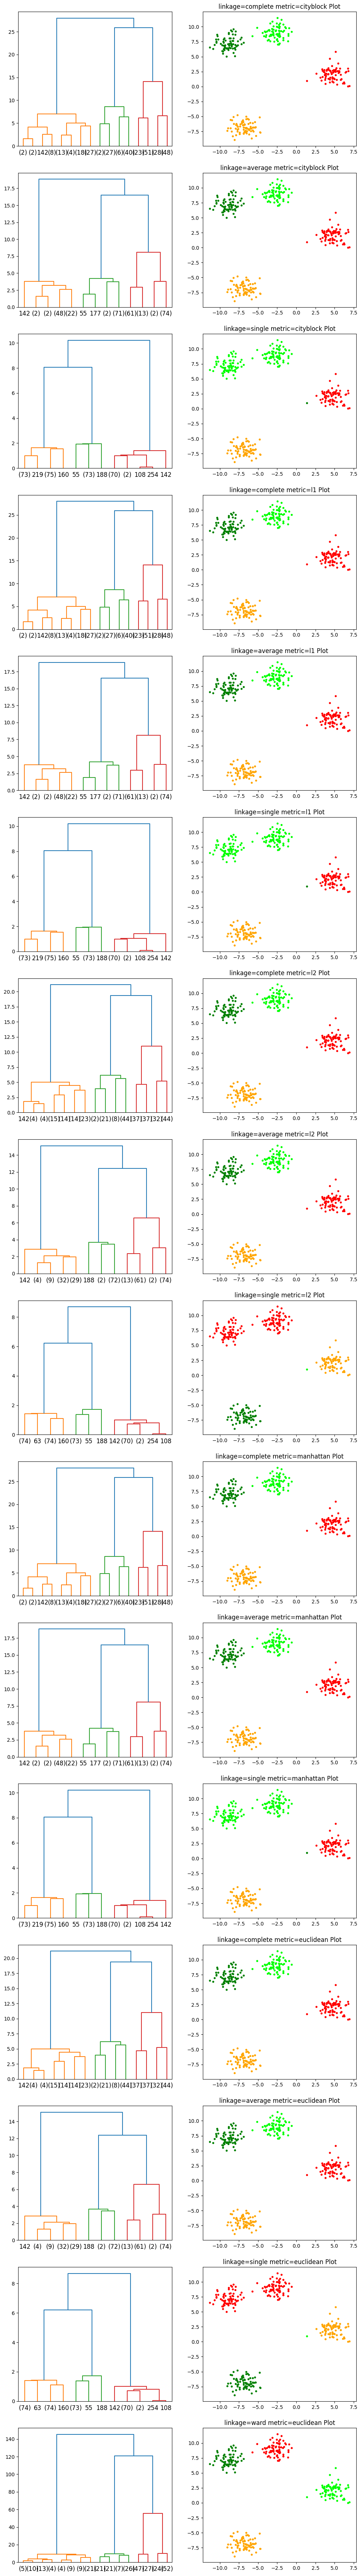

In [28]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

def plot_data(model, lin, met, ax):
    model.set_params(n_clusters=classes, distance_threshold=None)
    targ = model.fit_predict(X)
    
    if Y is not None: 
        print(f"Adjusted Rand Score        = {adjusted_rand_score(targ, Y):.2f} - Agglomerative Clustering - linkage={lin} metric={met}")
    print(f"Silhouette Score           = {silhouette_score(X, targ):.2f} - Agglomerative Clustering - linkage={lin} metric={met}\n")

    for idx, cl in enumerate(np.unique(targ)):
        ax.scatter(X[targ == cl, 0], X[targ == cl, 1], color=colors[idx], marker='.')
        ax.set_title(f"linkage={lin} metric={met} Plot")
        

met_array = ['cityblock', 'l1', 'l2', 'manhattan', 'euclidean']
lin_array = ['complete', 'average', 'single'] # 'ward' only works on euclidian thus it is appended only in the end

fig, axs = plt.subplots(len(lin_array) * len(met_array) + 1, 2, figsize=(fig_size * 2, fig_size * len(lin_array) * len(met_array) + 1))

m = 0
for i, met in enumerate(met_array):
    if(met == 'euclidean'):
        lin_array.append('ward')
    for j, lin in enumerate(lin_array):
        model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage=lin, metric=met)
        model = model.fit(X)

        plot_dendrogram(model, truncate_mode="level", p=3, ax=axs[m, 0])
        plot_data(model, lin, met, ax=axs[m, 1])
        m = m + 1

plt.show()

# Findings

All 3 methods performed exactly the same on this random data so everyone's a winner?